## Box Muller transform

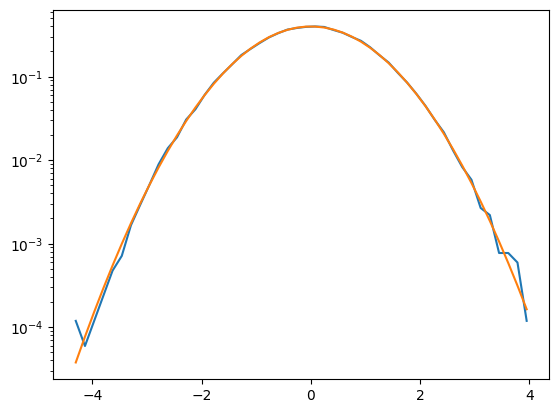

In [9]:
from math import inf
import numpy as np
import matplotlib.pyplot as plt

a = 0
b = np.pi*2
N = 100000
t = np.random.rand(N)
t = t*(b-a)+a

x = np.random.rand(N)
r = np.sqrt(-2*np.log(1-x))
y1 = r*np.cos(t)
y2 = r*np.sin(t)
 
# plt.hist(y2,bins = 50)
# plt.hist(y1,bins = 50)

counts,bins = np.histogram(y1,50)
deltax = bins[1]-bins[0]

pdf = (counts/N)/deltax

bin_mid = (bins[0:-1]+bins[1:])/2
gaussian = (1.0/np.sqrt(2*np.pi))*np.exp(-0.5*bin_mid**2)

plt.plot(bin_mid,pdf)
plt.plot(bin_mid,gaussian)
plt.yscale("log")
plt.show()




## travelling salesman

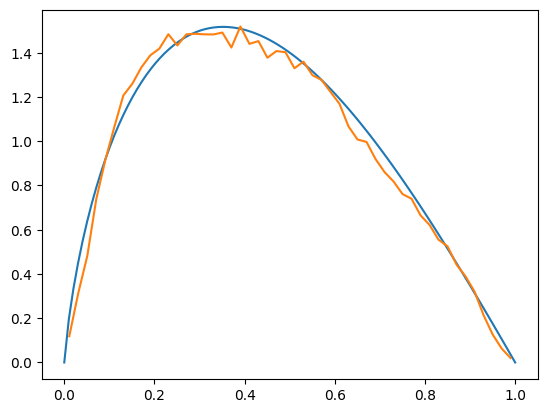

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.5])
dx = 0.2

def target(y):
    if np.abs(y)<1.0e-16:
        tg = 0.0
    else:
        tg = -np.sin(y)*np.log(y)
    return tg

vtarget = np.vectorize(target)

N = 100000

xlin = np.linspace(0,1,100)
tar = vtarget(xlin)
norm = np.sum(tar)*0.01
plt.plot(xlin,tar/norm)

for i in range (0,N):
    cstep = x[-1]
    step = dx*(np.random.rand()-0.5)
    nstep = cstep+step
    if(nstep<0 or nstep>1):
        continue

    accept = min(1.0,target(nstep)/target(cstep))
    if(np.random.rand()<accept):
        x = np.append(x,nstep)
    else:
        x=np.append(x,cstep)

counts,bins = np.histogram(x,50)
deltax = bins[1]-bins[0]

pdf = (counts/N)/deltax

bin_mid = (bins[0:-1]+bins[1:])/2
plt.plot(bin_mid,pdf)

# plt.hist(x)